In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

shelter_data = pd.read_csv('Austin_Animal_Center_clean_data.csv')

In [2]:
# Converting the intake and outcome data columns to datetime 

shelter_data['Intake Date'] = pd.to_datetime(shelter_data['Intake Date'])
shelter_data['Outcome Date'] = pd.to_datetime(shelter_data['Outcome Date'])
shelter_data[['Time In Shelter', 'Age at Intake', 'Age at Outcome']] = shelter_data[['Time In Shelter', 'Age at Intake', 'Age at Outcome']].apply(pd.to_timedelta)
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146964 entries, 0 to 146963
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Unnamed: 0                146964 non-null  int64          
 1   Animal ID                 146964 non-null  int64          
 2   Animal                    146964 non-null  object         
 3   Intake Date               146964 non-null  datetime64[ns] 
 4   Outcome Date              146964 non-null  datetime64[ns] 
 5   Time In Shelter           146964 non-null  timedelta64[ns]
 6   Age at Intake             146964 non-null  timedelta64[ns]
 7   Age Range at Intake       146964 non-null  object         
 8   Age at Outcome            146964 non-null  timedelta64[ns]
 9   Age Range at Outcome      146964 non-null  object         
 10  Intake Condition          146964 non-null  object         
 11  Intake Type               146964 non-null  object   

In [3]:
# dropping the column unnamed 
shelter_data.drop(columns='Unnamed: 0', inplace=True)

In [4]:
# Making a copy of the data 
shelter_copy = shelter_data.copy()

##### Making a copy of the data as we will need to change columns within the data, and do not want to affect the original dataset

In [5]:
# Converting the intake date and outcome date to only date values
shelter_copy['Intake Date'] = shelter_copy['Intake Date'].dt.strftime('%Y')
shelter_copy['Outcome Date'] = shelter_copy['Outcome Date'].dt.strftime('%Y')

# Overall intakes vs outcomes 

In [6]:
# Intakes per year
intake_by_year = shelter_copy.groupby('Intake Date')['Animal'].count()
intake_by_year.head(3)

Intake Date
2013     3941
2014    17686
2015    18035
Name: Animal, dtype: int64

In [7]:
# grouping outcome date by number of outcomes each year
outcome_by_year = shelter_copy.groupby('Outcome Date')['Animal'].count()
outcome_by_year.head(3)

Outcome Date
2013     3480
2014    17606
2015    17827
Name: Animal, dtype: int64

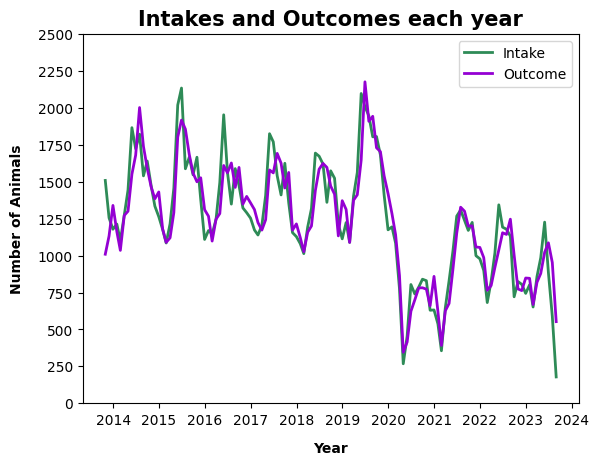

In [8]:
# Coparing intakes vs outcomes using visulisation 

outcome_by_year_CS = shelter_data.resample(rule='M', on='Outcome Date')['Animal'].count()
intake_by_year_CS = shelter_data.resample(rule='M', origin='start', on='Intake Date')['Animal'].count()


plt.plot(intake_by_year_CS, color="seagreen",label="Intake", linewidth=2)
plt.plot(outcome_by_year_CS, color="darkviolet", label="Outcome", linewidth=2)

plt.yticks(np.arange(0,2750, step=250))
plt.legend(loc="best")

plt.title('Intakes and Outcomes each year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontweight='bold', labelpad=10)

plt.show()

We can see from the graph above that for each year there seems to be a drop in intakes and outcomes nearing the end of the year and beginning of the new year. We can assume that this is due to the winter months but will look closer into this later on. During 2019, there was a peak in the intakes and outcomes which then had a major decrease in 2020. 


### Average monthly intakes and outcomes 

In [9]:
# Making another copy of the data but this one will hold the intake and outcome data in a year/month format - to allow for analysis by season
shelter_copy_year_month = shelter_data.copy()
shelter_copy_year_month['Intake Date'] = shelter_copy_year_month['Intake Date'].dt.strftime('%Y-%m')
shelter_copy_year_month['Outcome Date'] = shelter_copy_year_month['Outcome Date'].dt.strftime('%Y-%m')

In [10]:
# Isolate the months in a separate column
shelter_copy_year_month['Month_Intake'] = pd.DatetimeIndex(shelter_copy_year_month['Intake Date']).month
shelter_copy_year_month['Month_Outcome'] = pd.DatetimeIndex(shelter_copy_year_month['Outcome Date']).month
shelter_copy_year_month.head(5)

,Animal ID,Animal,Intake Date,Outcome Date,Time In Shelter,Age at Intake,Age Range at Intake,Age at Outcome,Age Range at Outcome,Intake Condition,...,Outcome Type,Sex,Neuter Status at Outcome,Breed,Mixed Breed,Colour,Total Touchpoints,Touchpoint Count,Month_Intake,Month_Outcome
0,664280,Dog,2013-10,2013-10,0 days 01:17:00,2192 days,5-7 yrs,2192 days,5-7 yrs,Normal,...,Return to Owner,Female,Spayed,Miniature Poodle Mix,True,Apricot,1,1,10,10
1,664286,Dog,2013-10,2013-10,6 days 02:04:00,731 days,2-3 yrs,737 days,2-3 yrs,Normal,...,Adoption,Female,Spayed,Chihuahua Shorthair Mix,True,White/Brown,1,1,10,10
2,664287,Dog,2013-10,2013-10,5 days 01:49:00,122 days,3-6 mon,127 days,3-6 mon,Normal,...,Adoption,Female,Spayed,Chihuahua Shorthair Mix,True,Brown/White,1,1,10,10
3,664288,Cat,2013-10,2013-10,0 days 02:10:00,731 days,2-3 yrs,731 days,2-3 yrs,Normal,...,Euthanasia,Male,Intact,Domestic Shorthair Mix,True,Blue/White,1,1,10,10
4,664289,Cat,2013-10,2013-10,1 days 20:38:00,92 days,3-6 mon,94 days,3-6 mon,Normal,...,Transfer,Female,Intact,Domestic Shorthair Mix,True,Brown Tabby/White,1,1,10,10


In [11]:
monthly_intakes = shelter_copy_year_month.groupby('Month_Intake')['Animal'].count().reset_index()
monthly_outcomes = shelter_copy_year_month.groupby('Month_Outcome')['Animal'].count().reset_index()

avg_intake_months = np.array(monthly_intakes['Animal'] / sum(monthly_intakes['Animal']))
avg_outcome_months = np.array(monthly_outcomes['Animal'] / sum(monthly_outcomes['Animal']))

In [12]:
# Converting intake and outcome months to word 
monthly_intakes['Month_Intake']= monthly_intakes['Month_Intake'].apply(lambda x: calendar.month_name[x])
monthly_outcomes['Month_Outcome']= monthly_outcomes['Month_Outcome'].apply(lambda x: calendar.month_name[x])
monthly_intakes

,Month_Intake,Animal
0,January,10467
1,February,9347
2,March,10638
3,April,11780
4,May,15505
5,June,15014
6,July,13676
7,August,12699
8,September,12392
9,October,13407


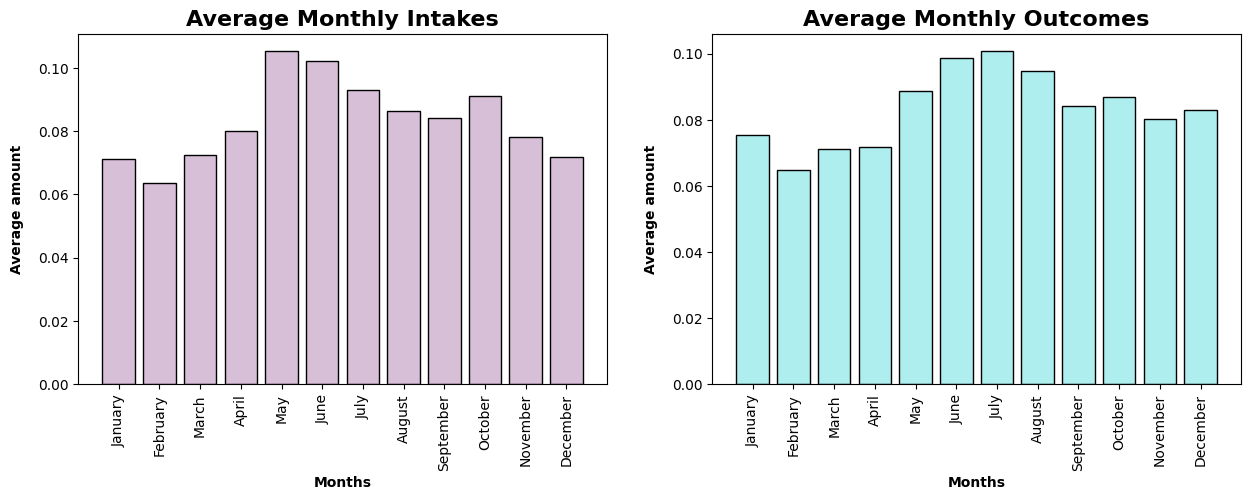

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.bar(monthly_intakes['Month_Intake'], avg_intake_months, color="thistle", edgecolor='black')
plt.title('Average Monthly Intakes', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Average amount', fontweight='bold', labelpad=10)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(monthly_outcomes['Month_Outcome'], avg_outcome_months, color="paleturquoise", edgecolor='black')
plt.title('Average Monthly Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Average amount', fontweight='bold', labelpad=10)
plt.xticks(rotation=90)
plt.show()

As we can see the number of intakes by the shelter does decrease during the winter months but mainly in February which has the least amount of intakes. However, as February is the shortest month, this could be another reason for the lower average intakes. This also applies to the outcomes, where there are less outcomes in February. 
In may we see an increase in the intakes and outcomes. However, during the summer months there outcomes stay quite high.

# Q2 - For the animals who are adopted, how long do they stay in the shelter before being re-homed?

## Mean duration an animal stays at the shelter 

Here we will look at the mean time an animal stays in the shleter depending on their age group and the type of animal

In [14]:
shelter_copy['Days in Shelter'] = shelter_copy['Time In Shelter'].dt.days

# Using for loop to loop through each row in the 'Days in Shelter' column to turn the value into an integer
for i in shelter_copy['Days in Shelter']:
    i = int(i)

# Checking that the row is now of int datatype
shelter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146964 entries, 0 to 146963
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Animal ID                 146964 non-null  int64          
 1   Animal                    146964 non-null  object         
 2   Intake Date               146964 non-null  object         
 3   Outcome Date              146964 non-null  object         
 4   Time In Shelter           146964 non-null  timedelta64[ns]
 5   Age at Intake             146964 non-null  timedelta64[ns]
 6   Age Range at Intake       146964 non-null  object         
 7   Age at Outcome            146964 non-null  timedelta64[ns]
 8   Age Range at Outcome      146964 non-null  object         
 9   Intake Condition          146964 non-null  object         
 10  Intake Type               146964 non-null  object         
 11  Outcome Type              146964 non-null  object   

In [28]:
# Retrieving data only if the outcome type was adoption

animal_shelter_adopt = shelter_copy[shelter_copy['Outcome Type'] == 'Adoption']
animal_shelter_adopt

animal_shelter_time = animal_shelter_adopt.groupby(['Animal', 
                                      'Age Range at Intake'])['Days in Shelter'].mean().reset_index()

animal_shelter_time.head(5)

,Animal,Age Range at Intake,Days in Shelter
0,Bird,0-3 mon,9.666667
1,Bird,1-2 yrs,14.678832
2,Bird,16-19 yrs,118.000000
3,Bird,2-3 yrs,8.226667
4,Bird,3-5 yrs,1.500000


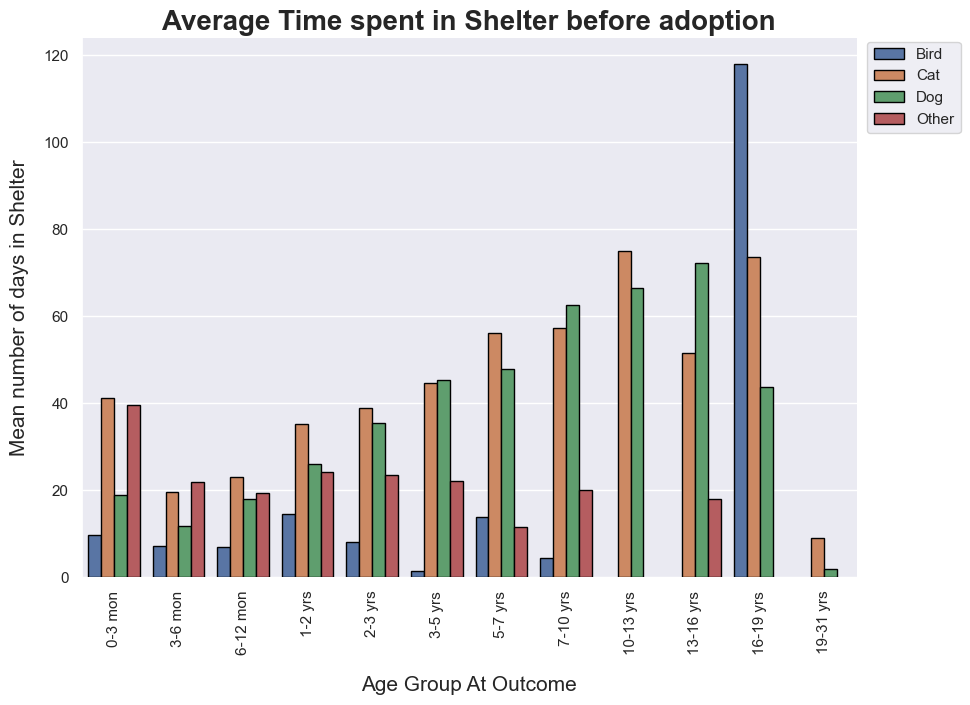

In [25]:
age_order = ['0-3 mon', '3-6 mon', '6-12 mon', '1-2 yrs', '2-3 yrs', '3-5 yrs', '5-7 yrs', '7-10 yrs', '10-13 yrs', '13-16 yrs', '16-19 yrs', '19-31 yrs']

bar = sns.barplot(x='Age Range at Intake', y='Days in Shelter', 
                  hue='Animal', data=animal_shelter_time, order=age_order, edgecolor='black')

bar.set_title('Average Time spent in Shelter before adoption', fontsize=20, fontweight='bold')
bar.set_ylabel('Mean number of days in Shelter', fontsize=15, labelpad=10)
bar.set_xlabel('Age Group At Outcome', fontsize=15, labelpad=15)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize": (10,7)})
sns.despine(bottom=True)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.2)
plt.show()

Newborn kittens spend more than 40 days on average within the shelter but could be due to the kittens not being ready for adoption as they are newborn. Kittens can usually be adopted by the age of 8 - 10 weeks which means after spending 40 days in the shelter, they have a higher chance of getting adopted and by this time they are around 3 months of age. This can be seen by the average time kittens between 3 - 6 months spend in the shelter. They spend less than 20 days on average in the shelter. By this age, kittens are more active which leads to quicker adoptions. Kittens are preferred over older cats as they are more energetic and the owners can build a bond with younger cats which may not be the same for older cats.
There is a steady increase in the average days cats spend in the shelter as their age increases which shows that as the cats get older, they are less likely to get adopted.

On Average Dogs spend fewer days in the shelter compared to cats. Dogs between the ages of 3 to 6 months spend a little over 10 days in the shelter, whereas cats of the same age spend almost double. This could be influenced by several factors such as the longevity as well as the overall attractiveness of younger dogs. There is also an increase in the number of days Dogs spend in the shelter as their age increases but this is still less when compared to cats. 

Nevertheless, we can say that as the animals get older, they tend to spend longer in the shelter. This can lead to the animals being at risk of behavioural problems especially for dogs which can lead to a decrease in adoption rates for the older animals. 



# Q3 Exploring the time of year animals are mostly adopted

#### Checking seasonal trends

In [ ]:
# Define a dictionary mapping for the different seasons and use apply to add the corresponding season
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

shelter_copy_year_month['Season_intake'] = shelter_copy_year_month['Month_Intake'].apply(lambda x: season_dict[x])
shelter_copy_year_month['Season_outcome'] = shelter_copy_year_month['Month_Outcome'].apply(lambda x: season_dict[x])
shelter_copy_year_month.head(5)

,Animal ID,Animal,Intake Date,Outcome Date,Time In Shelter,Age at Intake,Age Range at Intake,Age at Outcome,Age Range at Outcome,Intake Condition,...,Neuter Status at Outcome,Breed,Mixed Breed,Colour,Total Touchpoints,Touchpoint Count,Month_Intake,Month_Outcome,Season_intake,Season_outcome
0,664280,Dog,2013-10,2013-10,0 days 01:17:00,2192 days,5-7 yrs,2192 days,5-7 yrs,Normal,...,Spayed,Miniature Poodle Mix,True,Apricot,1,1,10,10,Fall,Fall
1,664286,Dog,2013-10,2013-10,6 days 02:04:00,731 days,2-3 yrs,737 days,2-3 yrs,Normal,...,Spayed,Chihuahua Shorthair Mix,True,White/Brown,1,1,10,10,Fall,Fall
2,664287,Dog,2013-10,2013-10,5 days 01:49:00,122 days,3-6 mon,127 days,3-6 mon,Normal,...,Spayed,Chihuahua Shorthair Mix,True,Brown/White,1,1,10,10,Fall,Fall
3,664288,Cat,2013-10,2013-10,0 days 02:10:00,731 days,2-3 yrs,731 days,2-3 yrs,Normal,...,Intact,Domestic Shorthair Mix,True,Blue/White,1,1,10,10,Fall,Fall
4,664289,Cat,2013-10,2013-10,1 days 20:38:00,92 days,3-6 mon,94 days,3-6 mon,Normal,...,Intact,Domestic Shorthair Mix,True,Brown Tabby/White,1,1,10,10,Fall,Fall


In [ ]:
# How many adopted in the summer
season_order= ['Spring', 'Summer', 'Fall', 'Winter']

outcomes_by_season_df = shelter_copy_year_month.groupby(['Outcome Type', 'Season_outcome'])['Animal'].count().reset_index()
outcomes_by_season_df = outcomes_by_season_df.sort_values(by='Animal', ascending=False).head(16)

outcomes_by_season_df = outcomes_by_season_df.set_index('Season_outcome')
outcomes_by_season_df

,Outcome Type,Animal
Season_outcome,,
Summer,Adoption,22065
Fall,Adoption,17631
Winter,Adoption,17364
Spring,Adoption,14410
Summer,Transfer,13554
Fall,Transfer,11403
Spring,Transfer,11232
Winter,Transfer,7860
Spring,Return to Owner,6730


In [ ]:
outcome_1 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Adoption'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_2 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Transfer'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_3 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Return to Owner'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_4 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Euthanasia'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])


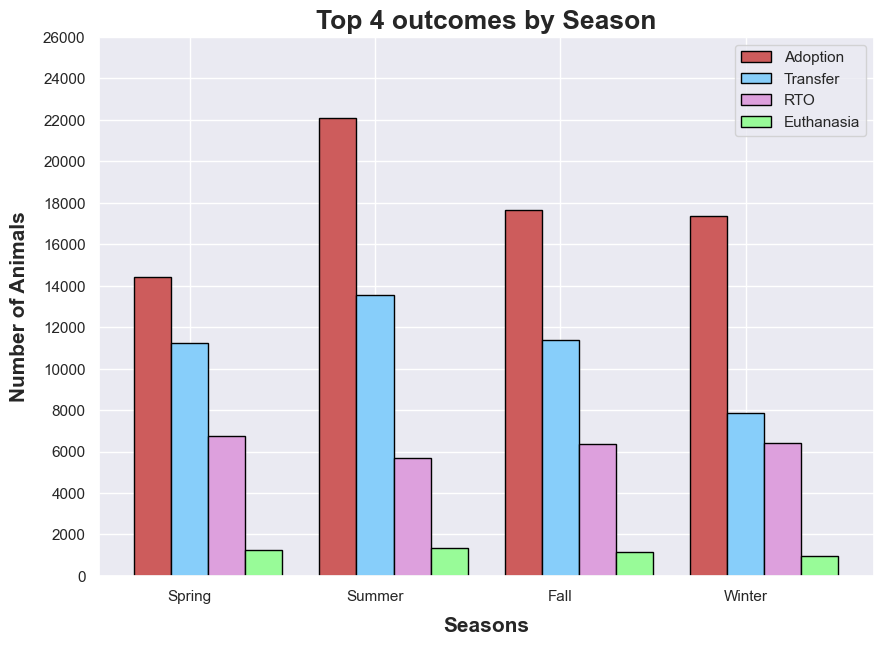

In [ ]:
# Setting figure size
plt.figure(figsize=(10,7))

# turning the x and y values into a numpy array
x = np.array(outcome_1.index)

y1 = np.array(outcome_1['Animal'])
y2 = np.array(outcome_2['Animal'])
y3 = np.array(outcome_3['Animal'])
y4 = np.array(outcome_4['Animal'])

# setting width of bars
barWidth = 0.2

# setting position of bars on the x axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.bar(r1, y1, width = barWidth, label='Adoption', edgecolor='black', color='indianred')
plt.bar(r2, y2, width = barWidth, label='Transfer', edgecolor='black', color='lightskyblue')
plt.bar(r3, y3, width = barWidth, label='RTO', edgecolor='black', color='plum')
plt.bar(r4,y4, width = barWidth, label='Euthanasia', edgecolor='black', color='palegreen')

# Adding ticks
plt.xticks([r + barWidth for r in range(len(r1))], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(np.arange(0, 27000, step=2000))

plt.xlabel('Seasons', fontsize = 15, fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontsize = 15, fontweight='bold', labelpad=10)
plt.title('Top 4 outcomes by Season', fontsize = 19, fontweight = 'bold')
plt.legend()
plt.show()

By looking at the top 4 outcome types of animals by season, we can see that quite a few animals are adopted in the winter but during the spring is when their are fewer animals adopted. There are also a significant amount of transfers which could be due to the increase in intakes which means the shelter does not have enough space / resources for the animals. Therefore, they have to be transferred elsewhere. 


### Types of animals adopted each season

In [ ]:
# only returning data on the outcome type, animal and season of outcome and then reducing the data to only include the amount of animals adopted.

animals_adopted_by_season_df = shelter_copy_year_month.value_counts(['Outcome Type', 'Season_outcome', 'Animal']).reset_index()
animals_adopted_by_season_df = animals_adopted_by_season_df[animals_adopted_by_season_df['Outcome Type'] == 'Adoption'].set_index('Season_outcome')

animals_adopted_by_season_df

,Outcome Type,Animal,count
Season_outcome,,,
Winter,Adoption,Dog,10987
Summer,Adoption,Cat,10928
Summer,Adoption,Dog,10853
Spring,Adoption,Dog,9986
Fall,Adoption,Dog,9516
Fall,Adoption,Cat,7783
Winter,Adoption,Cat,6174
Spring,Adoption,Cat,4156
Fall,Adoption,Other,254


In [ ]:
# storing data for each animal in a seperate df to then use to plot graph
animal_1 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Dog'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
animal_2 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Cat'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
animal_3 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Bird'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
animal_4 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Other'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])

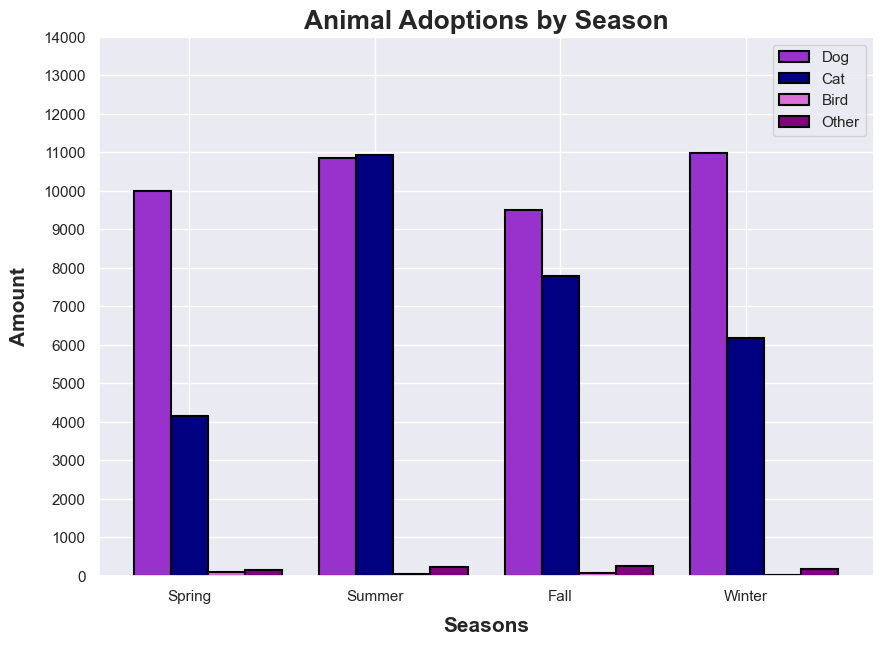

In [ ]:
# turning the x and y values into a numpy array
x = np.array(animal_1.index)

y1 = np.array(animal_1['count'])
y2 = np.array(animal_2['count'])
y3 = np.array(animal_3['count'])
y4 = np.array(animal_4['count'])

# setting width of bars
barWidth = 0.2

# setting position of bars on the x axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.bar(r1, y1, width = barWidth, label='Dog', edgecolor='black', color='darkorchid', linewidth=1.5)
plt.bar(r2, y2, width = barWidth, label='Cat', edgecolor='black', color="navy", linewidth=1.5)
plt.bar(r3, y3, width = barWidth, label='Bird', edgecolor='black', color='orchid', linewidth=1.5)
plt.bar(r4,y4, width = barWidth, label='Other', edgecolor='black', color='purple', linewidth=1.5)

# Adding ticks
plt.xticks([r + barWidth for r in range(len(r1))], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(np.arange(0, 15000, step=1000))

plt.xlabel('Seasons', fontsize = 15, fontweight='bold', labelpad=10)
plt.ylabel('Amount', fontsize = 15, fontweight="bold", labelpad=10)
plt.title('Animal Adoptions by Season', fontsize = 19, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The number of dogs adopted stays on the higher side for all 4 seasons compared to the adoptions for cats. In spring their is major decrease in cat adoptions with the winter period have the second lowest amount of adoptions for cats. 
Adoptions are more popular during the summer for both cats and dogs 

One of the reasons for a large amount of dogs in the winter period may be due to the holiday / christmas period.

### Animal outcomes by Month

In [ ]:
monthly_outcome_types = shelter_copy_year_month.groupby(['Month_Outcome', 'Outcome Type'])['Animal'].count().reset_index()

# Converting intake and outcome months to word 
monthly_outcome_types['Month_Outcome']= monthly_outcome_types['Month_Outcome'].apply(lambda x: calendar.month_name[x])
monthly_outcome_types

,Month_Outcome,Outcome Type,Animal
0,January,Adoption,5798
1,January,Died,78
2,January,Euthanasia,295
3,January,Missing,4
4,January,Return to Owner,2234
...,...,...,...
76,December,Died,94
77,December,Euthanasia,331
78,December,Missing,7
79,December,Return to Owner,2235


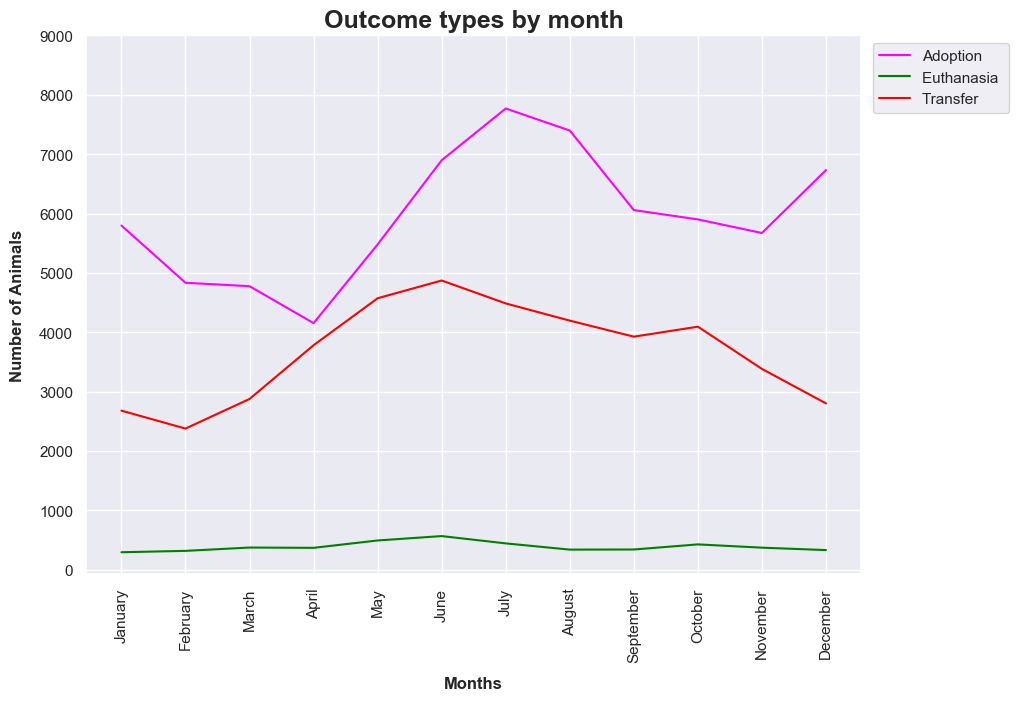

In [ ]:
# plotting outcome types by month

outcome_adoption = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Adoption']
outcome_euthanasia = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Euthanasia']
outcome_transfer = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Transfer']

plt.plot(outcome_adoption['Month_Outcome'], outcome_adoption['Animal'], color="magenta",label="Adoption")
plt.plot(outcome_euthanasia['Month_Outcome'], outcome_euthanasia['Animal'], color="green", label="Euthanasia ")
plt.plot(outcome_transfer['Month_Outcome'], outcome_transfer['Animal'], color="red", label="Transfer ")

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 10000, step=1000))

plt.title('Outcome types by month', fontweight='bold', fontsize=18)
plt.xlabel('Months', fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontweight='bold', labelpad=10)

plt.legend(loc="best", bbox_to_anchor=(1.2,1))
plt.show()

In april there is a dip in the amount of adoptions whereas transfer is on the rise. The reasons for the increase in transfers may be due to the shelter having an influx on intakes and as they are unable to manage the intake amount, animals have to be transferred. Also when the adoption rates drop, we can see an increase in the transfers. 

### Analysing adoption outcome during covid

In [ ]:
# Grouping by outcome date and outcome type

outcome_animal_types = shelter_copy[['Outcome Date', 'Outcome Type']].value_counts().sort_index()
outcome_animal_types = outcome_animal_types.reset_index()

outcome_animal_types.head(5)

,Outcome Date,Outcome Type,count
0,2013,Adoption,1304
1,2013,Died,16
2,2013,Euthanasia,255
3,2013,Missing,2
4,2013,Return to Owner,702


In [ ]:
# Narrowing down to look at data for 2019 and 2020

outcome_type_2019_2020 = outcome_animal_types[outcome_animal_types['Outcome Date'].isin(['2019', '2020'])]

outcome_type_2019_2020.head(2)

,Outcome Date,Outcome Type,count
39,2019,Adoption,9411
40,2019,Died,258


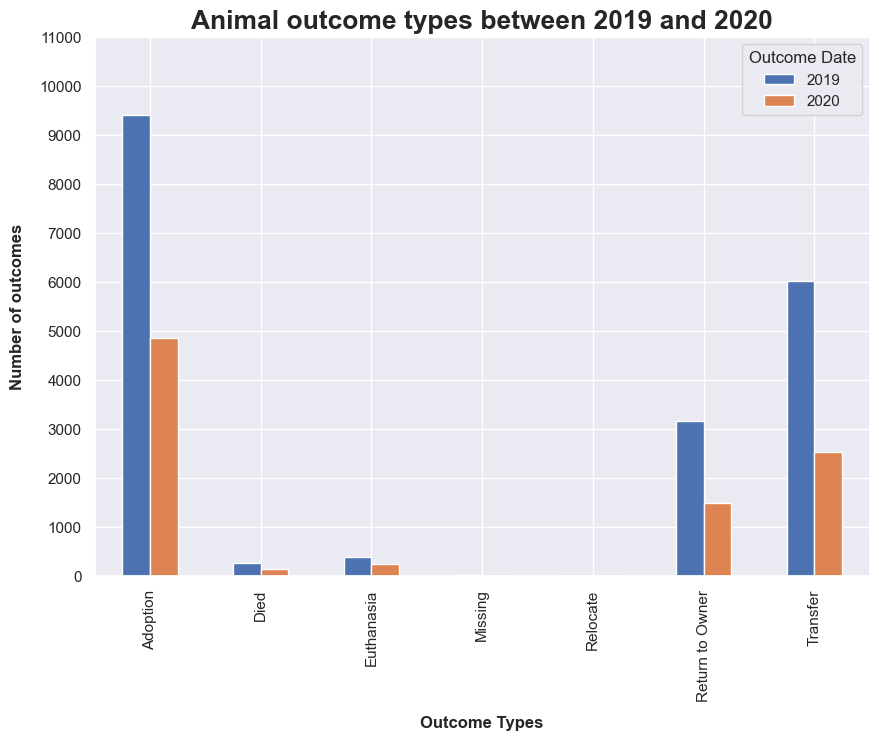

In [ ]:
outcome_type_2019_2020.pivot(index="Outcome Type", columns="Outcome Date", values="count").plot(kind="bar")
plt.xlabel('Outcome Types', fontweight='bold', labelpad=10)
plt.ylabel('Number of outcomes', fontweight='bold', labelpad=10)
plt.title('Animal outcome types between 2019 and 2020',fontweight='bold', fontsize=19)
plt.yticks(np.arange(0, 12000, step=1000))
plt.show()

In 2019, there was a higher adoption rate by almost double the amount of adoptions that took place in 2020. However, we can argue that due to the reduce amount of outcomes in 2020, the adoption rates aren't as low as expected as from all the other outcome types, adoptions was still the highest in 2020. 
However, there were still a significant amount of animals that were transferred in both 2019 and 2020. 

Due to covid, the number of adoptions had reduced but this is also due to the shelter not having as many intakes

# Q4 How the adoption rate changed over time

### Comparison of the number of intakes vs the adoption rates each year

In [ ]:
# Looking at the adoption rate per year
outcome_adoption = shelter_copy[shelter_copy['Outcome Type'] == 'Adoption']

adoption_by_year = outcome_adoption.groupby('Intake Date', as_index=False)['Animal'].count()
adoption_by_year

,Intake Date,Animal
0,2013,1628
1,2014,7055
2,2015,7492
3,2016,8103
4,2017,8000
5,2018,8130
6,2019,9346
7,2020,4708
8,2021,6899
9,2022,6682


In [ ]:
# Seeing all the outcome types 

outcome_types = shelter_copy.groupby(['Outcome Type'], as_index=False)['Animal'].count()
outcome_types

,Outcome Type,Animal
0,Adoption,71470
1,Died,1524
2,Euthanasia,4670
3,Missing,74
4,Relocate,12
5,Return to Owner,25160
6,Stolen,5
7,Transfer,44049


In [ ]:
outcome_adopt = shelter_copy.query("`Outcome Type` == 'Adoption'").groupby('Intake Date')['Animal'].count().to_list()
outcome_adopt

[1628, 7055, 7492, 8103, 8000, 8130, 9346, 4708, 6899, 6682, 3427]

From the outcome types count, we can see that aside from adoption, the other outcomes with high values are euthanasia, return to owner and transfer.
Therefore we will just look into this data

In [ ]:
outcome_died = shelter_copy.query("`Outcome Type` == 'Died'").groupby('Intake Date')['Animal'].count().to_list()
outcome_died

[20, 105, 154, 190, 149, 168, 261, 133, 149, 115, 80]

In [ ]:
# Grouping by Euthanasia
outcome_euthanasia = shelter_copy.query("`Outcome Type` == 'Euthanasia'").groupby('Intake Date')['Animal'].count().to_list()
outcome_euthanasia

[269, 1090, 907, 469, 374, 295, 390, 241, 259, 253, 123]

In [ ]:
outcome_rto = shelter_copy.query("`Outcome Type` == 'Return to Owner'").groupby('Intake Date')['Animal'].count().to_list()
outcome_rto

[735, 3286, 3493, 3298, 3338, 3147, 3149, 1480, 1357, 1271, 606]

In [ ]:
outcome_transfer = shelter_copy.query("`Outcome Type` == 'Transfer'").groupby('Intake Date')['Animal'].count().to_list()
outcome_transfer

[1287, 6146, 5970, 4769, 4858, 4622, 6035, 2473, 2916, 3038, 1935]

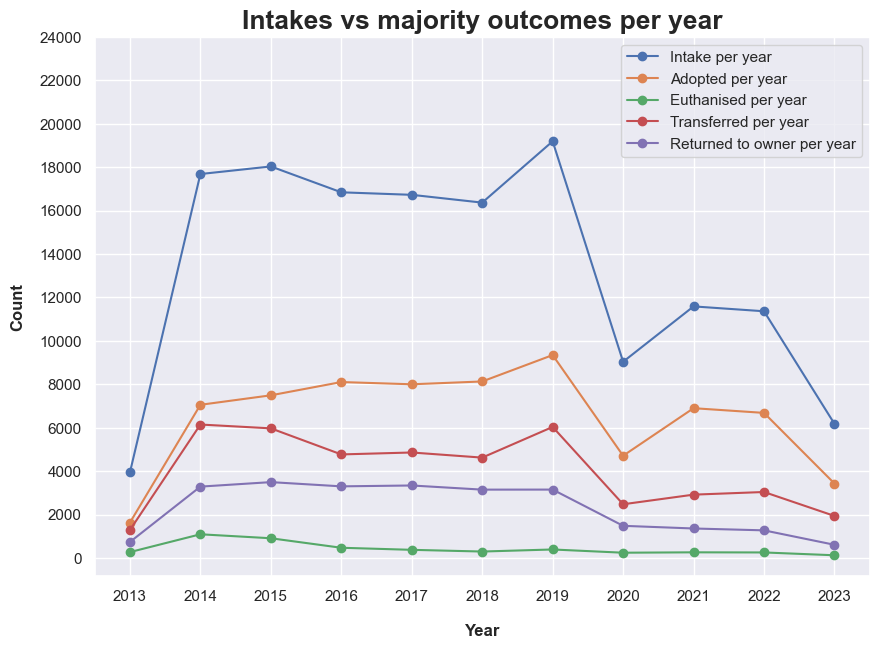

In [ ]:
x_val_year = intake_by_year.index
y_val_intake = intake_by_year

# Setting values to the correct x and y axis to use when plotting

plt.plot(x_val_year, y_val_intake, '-o', label='Intake per year')
plt.plot(x_val_year, outcome_adopt, '-o' , label='Adopted per year')
plt.plot(x_val_year, outcome_euthanasia, '-o' , label='Euthanised per year')
plt.plot(x_val_year, outcome_transfer, '-o' , label='Transferred per year')
plt.plot(x_val_year, outcome_rto, '-o' , label='Returned to owner per year')

plt.title('Intakes vs majority outcomes per year', fontsize=19, fontweight='bold')
plt.xlabel('Year', fontweight='bold', labelpad=15)
plt.ylabel('Count', fontweight='bold', labelpad=10)
plt.yticks(np.arange(0, 25000, step=2000))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The graph above shows the adoption rate compared to the intakes per year. There was a steady increase in the adoption rates between 2014 and 2018. In 2019 the adoption rates increased but not as much as the intakes. 
From 2019 to 2020, there was a decrease in the adoption rates but this is due to the major decrease in intakes. However, despite this there is still a big gap between the number of intakes and the adoption rates. 
Therefore we will compare each outcome type for each year with the intakes per year, to see whether the adoption rate was the highest amongst all outcome types or not.

As expected the adoption rates has been the highest each year, however, the number of transfers is higher than expected. As we can see the overall intakes is very high, this means the animals that do not get adopted or aren't returned to their owner, will end up getting transferred. This may be due to insufficient space in the austin shelter to keep all the animals that are taken in. 